<a href="https://colab.research.google.com/github/ricardo-kowalski/processo_bex/blob/main/analise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO Be.X SEGUNDA FASE #


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/drive',force_remount=True)
%cd /drive/My\ Drive/Colab Notebooks/Be.X
!ls

Mounted at /drive
/drive/My Drive/Colab Notebooks/Be.X
 alter_demanda_diaria_ALPHA.csv   demanda_diaria_ALPHA.csv
 analise1.ipynb			  demanda.gsheet
 analise2.ipynb			 'PROJETO_BEX_SEGUNDA_FASE (2).pdf'
'Cópia de analise2.ipynb'


In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
path = "alter_demanda_diaria_ALPHA.csv"
# lê o csv desconsiderando os pontos das centenas
df = pd.read_csv(path, header=0, sep=",", thousands='.')
# df = pd.read_csv(path, header=0, sep=";", decimal=",", thousands='.', index_col=1)
#remove última columa vazia
# df = df.drop(labels='Unnamed: 13', axis=1)
df.head()

,mes,dia,semana_mes,dia_da_semana,encomendas_urgentes,encomendas_nao_urgentes,encomendas_tipo_A,encomendas_tipo_B,encomendas_tipo_C,encomendas_setor_fiscal,encomendas_setor_controlador_transito,encomendas_setor_bancario_01,encomendas_setor_bancario_02,encomendas_setor_bancario_03,total_encomendas
0,2,3,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577
1,2,4,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675
2,2,5,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,129412
3,2,8,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,317120
4,2,9,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,210517


In [ ]:
df.shape

(60, 15)

In [ ]:
# adicionando um ano para criar o datetime
df.insert(0, 'ano', 2020)

In [ ]:
# df2 = df[["ano", "mes", "dia"]].copy()
# df2.columns = ["year", "month", "day"]

In [ ]:
df['dateInt']=df['ano'].astype(str) + df['mes'].astype(str).str.zfill(2)+ df['dia'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')

In [ ]:
df.head()

,ano,mes,dia,semana_mes,dia_da_semana,encomendas_urgentes,encomendas_nao_urgentes,encomendas_tipo_A,encomendas_tipo_B,encomendas_tipo_C,encomendas_setor_fiscal,encomendas_setor_controlador_transito,encomendas_setor_bancario_01,encomendas_setor_bancario_02,encomendas_setor_bancario_03,total_encomendas,dateInt,Date
0,2020,2,3,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577,20200203,2020-02-03
1,2020,2,4,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675,20200204,2020-02-04
2,2020,2,5,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,129412,20200205,2020-02-05
3,2020,2,8,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,317120,20200208,2020-02-08
4,2020,2,9,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,210517,20200209,2020-02-09


In [ ]:
import calendar
df['semana'] = df.dia_da_semana.apply(lambda x: calendar.day_abbr[x])

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
# criando um segundo dataframe com apenas infos essenciais

df2 = df.copy()

df2 = df.drop(labels=['dateInt', 'ano', 'mes', 'dia', 'semana_mes', 'dia_da_semana'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2020-02-03 to 2020-04-27
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   ano                                    60 non-null     int64 
 1   mes                                    60 non-null     int64 
 2   dia                                    60 non-null     int64 
 3   semana_mes                             60 non-null     int64 
 4   dia_da_semana                          60 non-null     int64 
 5   encomendas_urgentes                    60 non-null     int64 
 6   encomendas_nao_urgentes                60 non-null     int64 
 7   encomendas_tipo_A                      60 non-null     int64 
 8   encomendas_tipo_B                      60 non-null     int64 
 9   encomendas_tipo_C                      60 non-null     int64 
 10  encomendas_setor_fiscal                60 non-null     int64 
 11  e

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2020-02-03 to 2020-04-27
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encomendas_urgentes                    60 non-null     int64 
 1   encomendas_nao_urgentes                60 non-null     int64 
 2   encomendas_tipo_A                      60 non-null     int64 
 3   encomendas_tipo_B                      60 non-null     int64 
 4   encomendas_tipo_C                      60 non-null     int64 
 5   encomendas_setor_fiscal                60 non-null     int64 
 6   encomendas_setor_controlador_transito  60 non-null     object
 7   encomendas_setor_bancario_01           60 non-null     int64 
 8   encomendas_setor_bancario_02           60 non-null     int64 
 9   encomendas_setor_bancario_03           60 non-null     int64 
 10  total_encomendas                       60 non-null     int64 
 11  s

In [ ]:
df2.describe()

,encomendas_urgentes,encomendas_nao_urgentes,encomendas_tipo_A,encomendas_tipo_B,encomendas_tipo_C,encomendas_setor_fiscal,encomendas_setor_bancario_01,encomendas_setor_bancario_02,encomendas_setor_bancario_03,total_encomendas
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,172554.933333,118920.850000,52112.216667,109229.850000,139531.250000,9397.533333,46640.833333,79401.483333,23114.633333,300873.316667
std,69505.787985,27170.928513,18829.910604,50741.388224,41442.931565,23186.188109,45220.736293,40504.420041,13148.039829,89602.040745
min,43651.000000,77371.000000,21826.000000,25125.000000,74372.000000,0.000000,3452.000000,16411.000000,7679.000000,129412.000000
25%,125348.000000,100888.000000,39456.250000,74916.250000,113632.250000,89.500000,20130.000000,50680.500000,12609.750000,238195.500000
50%,151062.500000,113114.500000,47166.500000,99482.000000,127990.000000,1635.000000,32527.500000,67181.000000,18011.500000,288034.500000
75%,194606.500000,132108.250000,58463.750000,132171.000000,160107.500000,12520.250000,45118.750000,94787.750000,31047.750000,334237.250000
max,435304.000000,223270.000000,118178.000000,267342.000000,302448.000000,169275.000000,210508.000000,188411.000000,73839.000000,616453.000000




---

Histograma



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe37c9d0b90>,
      dtype=object)

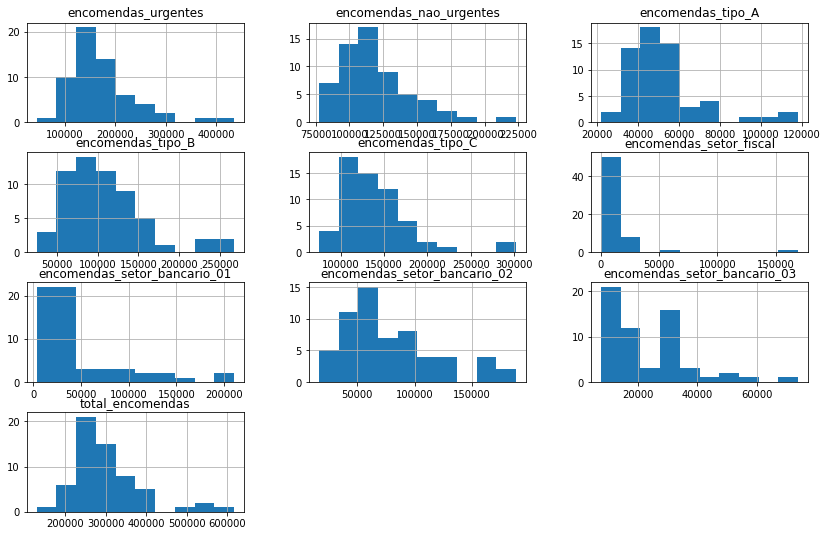

In [ ]:
df2.hist(figsize=(14, 9))

In [ ]:
# corr = df2.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

# plt.show()



---



---

# Análise semanal #

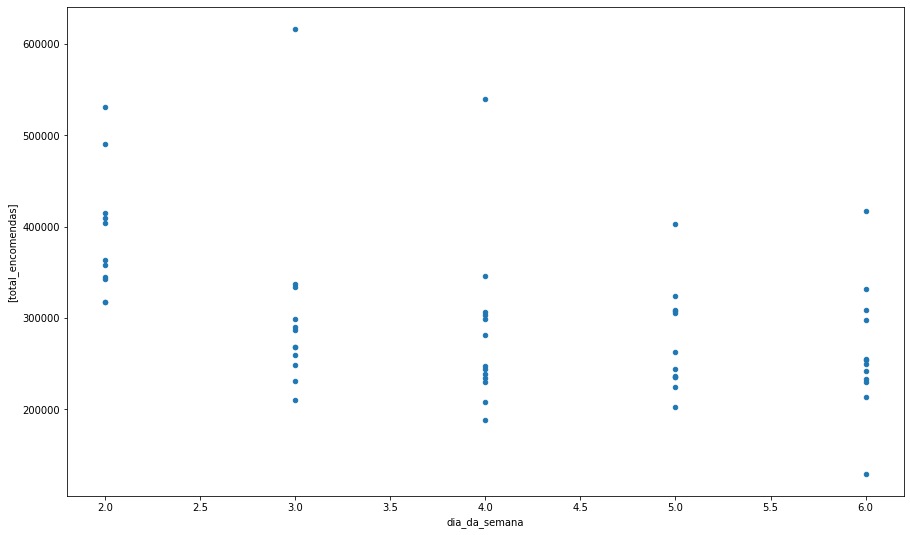

In [ ]:
df.plot.scatter(figsize=(15, 9), x="dia_da_semana", y=["total_encomendas"])

pyplot.show()

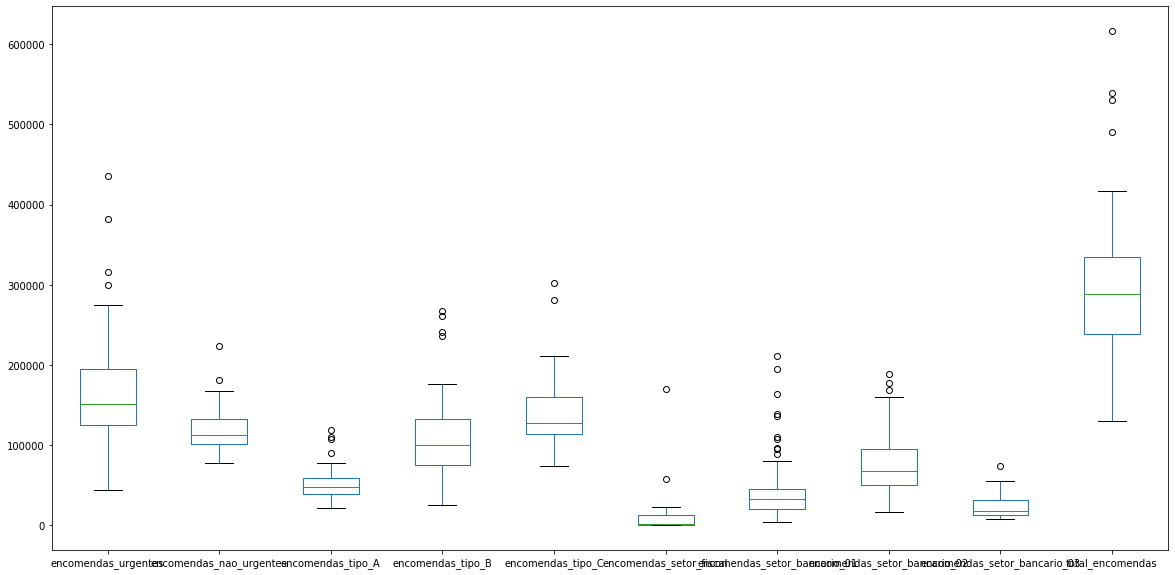

In [ ]:
df2.plot.box(figsize=(20, 10))

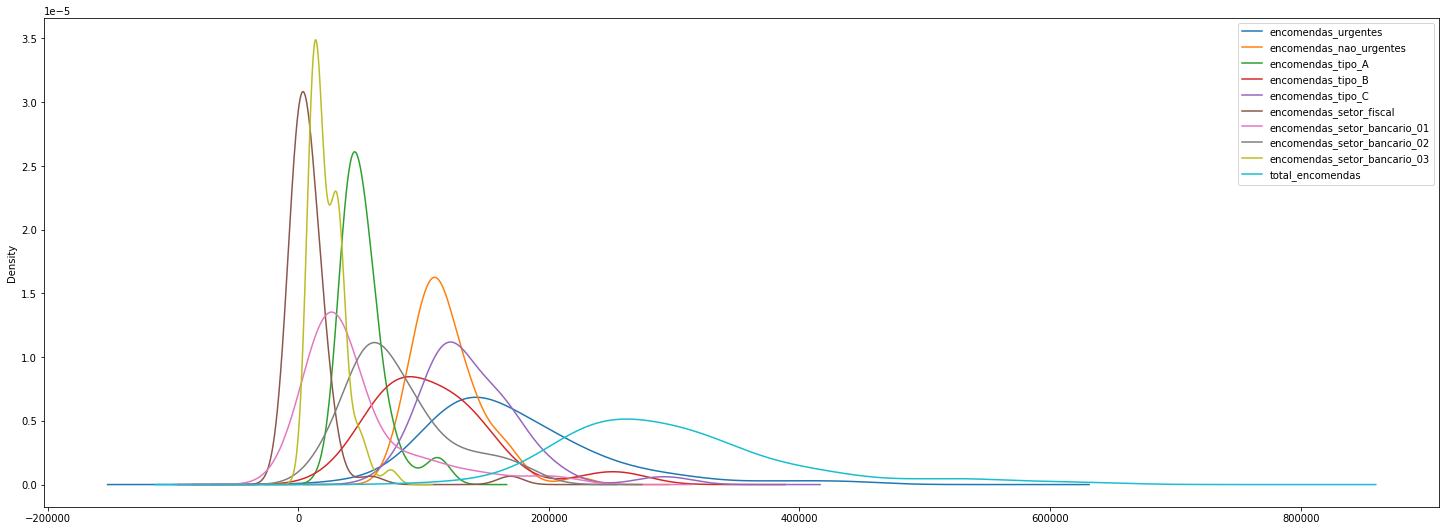

In [ ]:
df2.plot(figsize=(25, 9), kind="kde")

## Média de encomendas semanais (por categoria) ##

In [ ]:
by_weekday = df.groupby(df.dia_da_semana).mean()
by_weekday.index = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex']

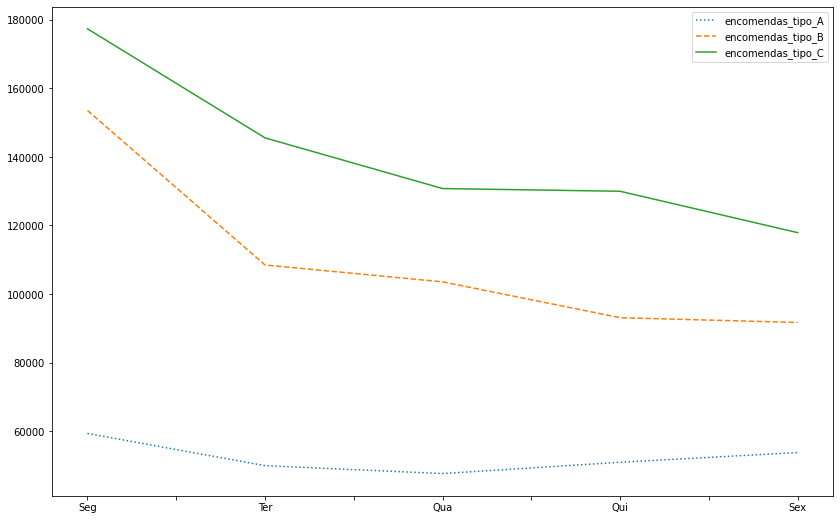

In [ ]:

by_weekday.plot(style=[':', '--', '-'], figsize=(14, 9),  y=["encomendas_tipo_A", "encomendas_tipo_B", "encomendas_tipo_C"]);

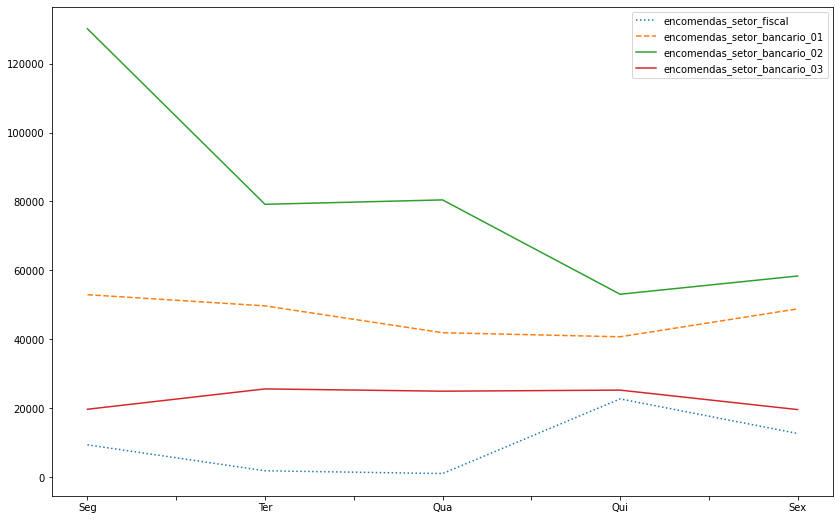

In [ ]:

by_weekday.plot(style=[':', '--', '-'], figsize=(14, 9), y=["encomendas_setor_fiscal", "encomendas_setor_bancario_01", "encomendas_setor_bancario_02", "encomendas_setor_bancario_03"]);

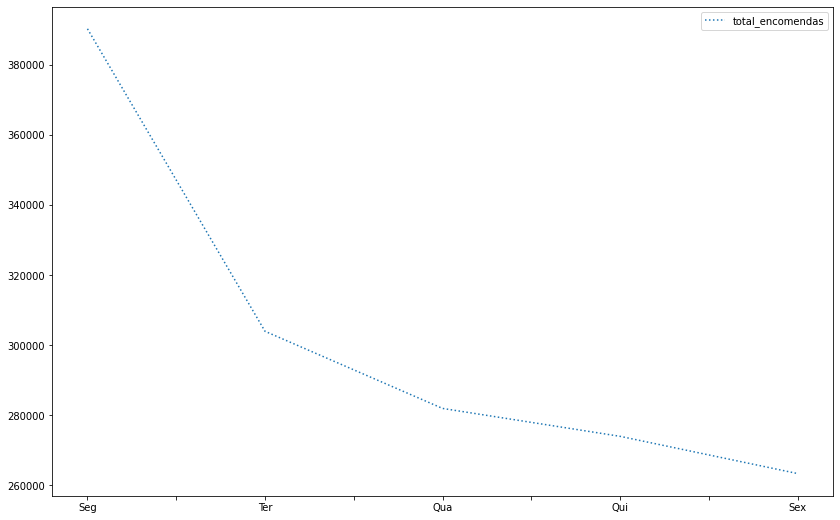

In [ ]:

by_weekday.plot(style=[':', '--', '-'], figsize=(14, 9), y=["total_encomendas"]);

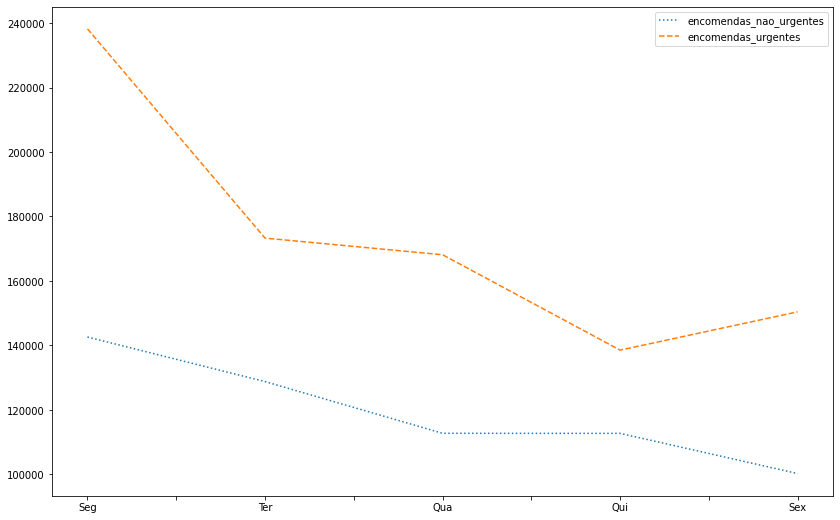

In [ ]:

by_weekday.plot(style=[':', '--', '-'], figsize=(14, 9), y=['encomendas_nao_urgentes','encomendas_urgentes']);



---



---


# Série temporal #



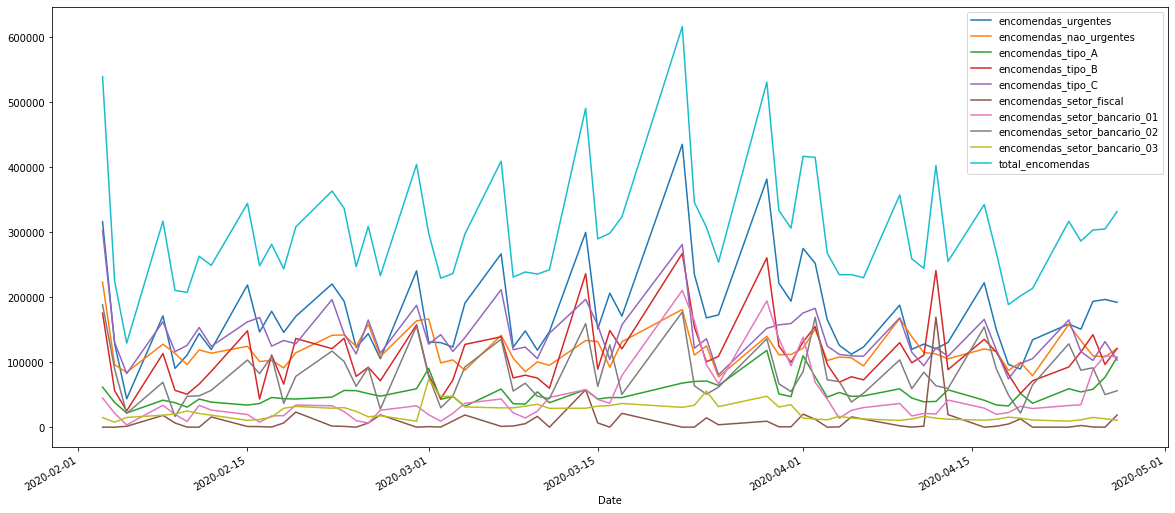

In [ ]:
df2.plot(figsize=(20, 9))



---



---



---



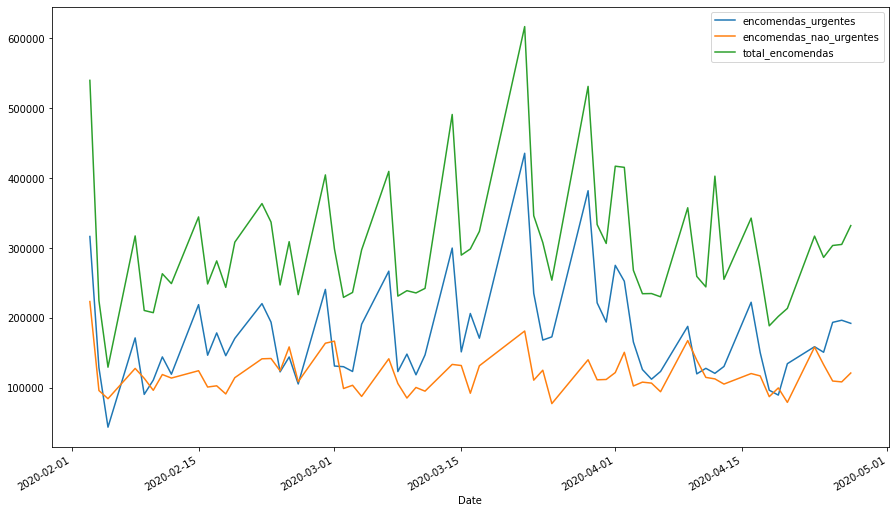

In [ ]:
df.plot(figsize=(15, 9), y=["encomendas_urgentes", "encomendas_nao_urgentes", "total_encomendas"])

pyplot.show()

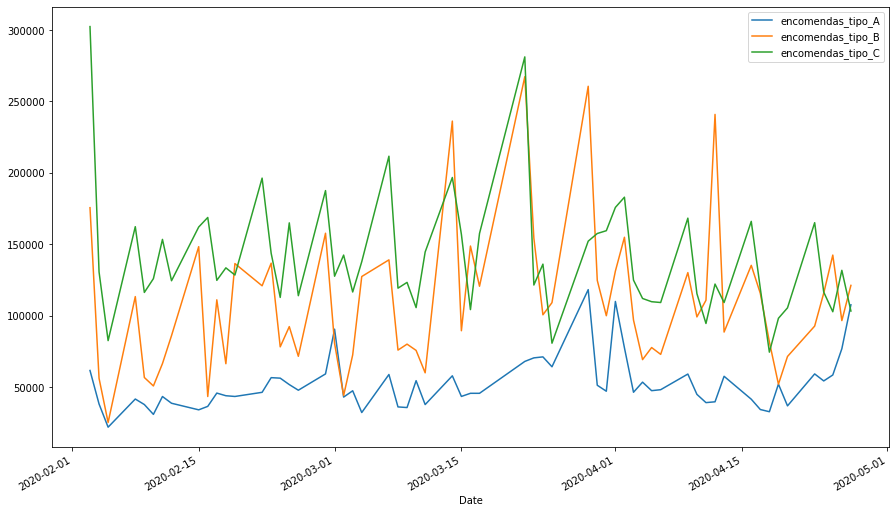

In [ ]:
df.plot(figsize=(15, 9), y=["encomendas_tipo_A", "encomendas_tipo_B", "encomendas_tipo_C"])

pyplot.show()

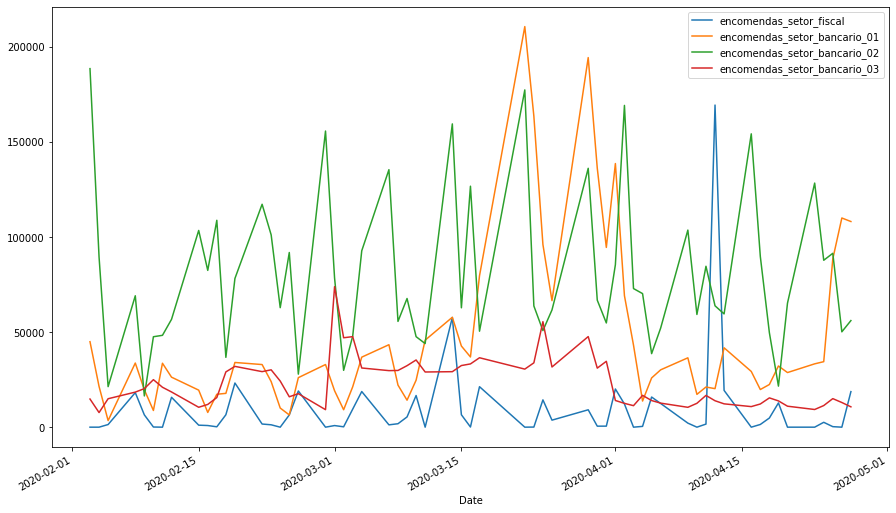

In [ ]:
df.plot(figsize=(15, 9), y=["encomendas_setor_fiscal", "encomendas_setor_bancario_01", "encomendas_setor_bancario_02", "encomendas_setor_bancario_03"])

pyplot.show()



---

## Analisando tendências (total de encomendas) ##

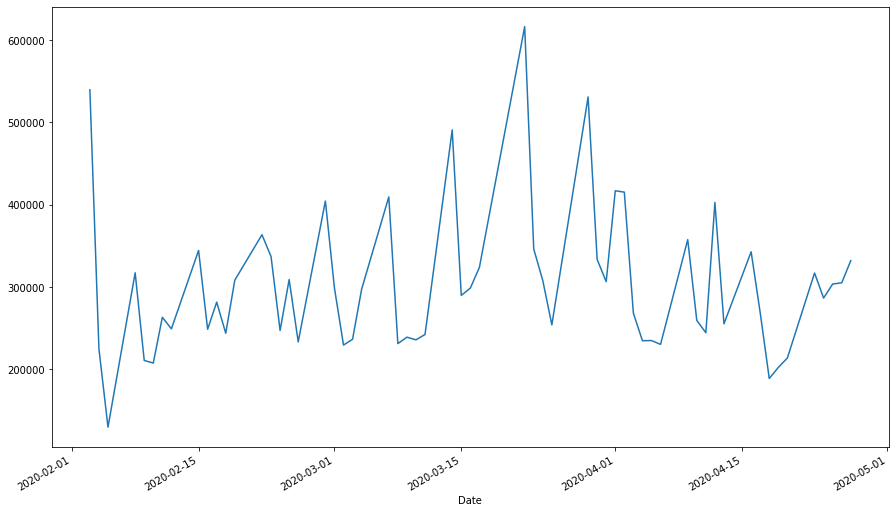

In [ ]:
df.total_encomendas.plot(figsize=(15, 9))



---



---



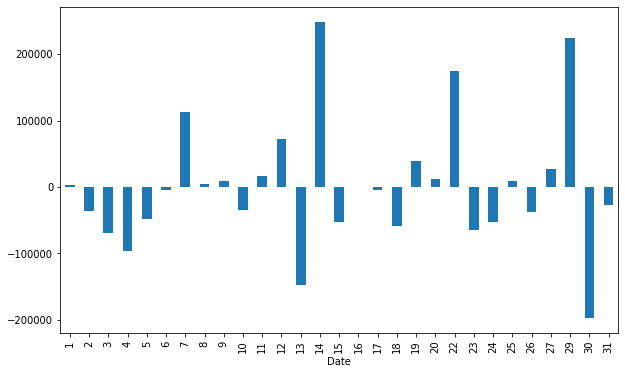

In [ ]:
df.total_encomendas.diff(1).groupby(df.index.day).mean().plot(kind='bar', figsize=(10, 6))

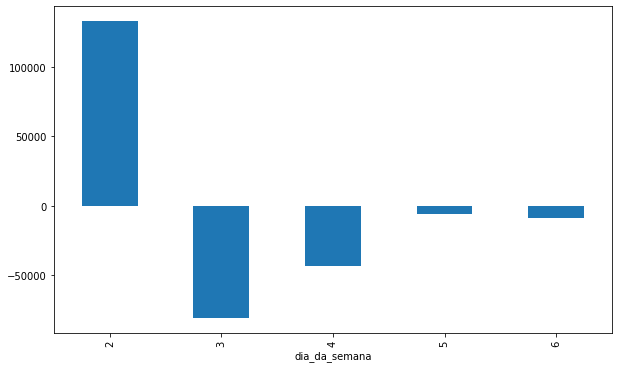

In [ ]:
df.total_encomendas.diff(1).groupby(df.dia_da_semana).mean().plot(kind='bar', figsize=(10, 6))



---



---



---

# Testes com Modelos Preditivos #

In [ ]:
df2['naive_prediction'] = df.total_encomendas.shift(1)
df2.head()

,encomendas_urgentes,encomendas_nao_urgentes,encomendas_tipo_A,encomendas_tipo_B,encomendas_tipo_C,encomendas_setor_fiscal,encomendas_setor_controlador_transito,encomendas_setor_bancario_01,encomendas_setor_bancario_02,encomendas_setor_bancario_03,total_encomendas,semana,naive_prediction
Date,,,,,,,,,,,,,
2020-02-03,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577,Fri,NaN
2020-02-04,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675,Sat,539577.0
2020-02-05,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,129412,Sun,224675.0
2020-02-08,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,317120,Wed,129412.0
2020-02-09,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,210517,Thu,317120.0


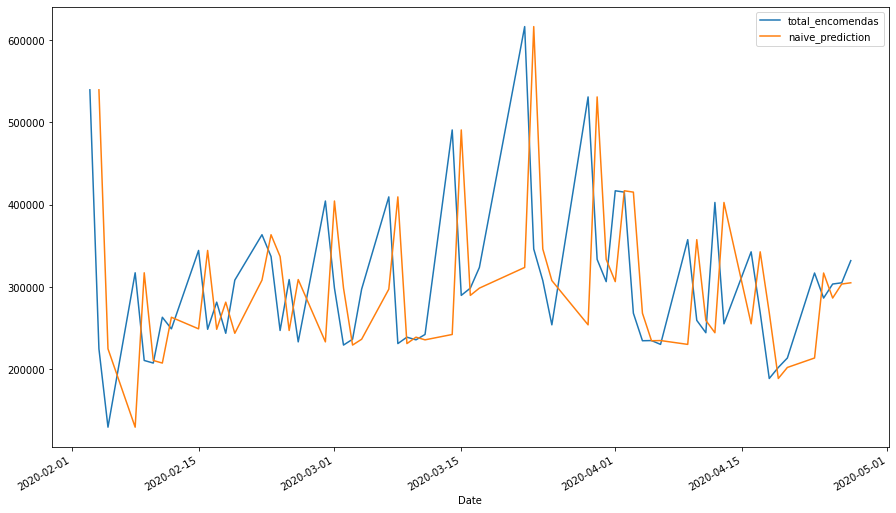

In [ ]:
# configurando tamanho das figuras
df.plot(figsize=(15, 9), y = ['total_encomendas', 'naive_prediction'])

In [ ]:
plt.rcParams["figure.figsize"] = (15,9)


In [ ]:
train_size = int(len(df2.total_encomendas) * 2 / 3)
train_size

40

In [ ]:
train_set = df2.total_encomendas[:train_size]
test_set = df2.total_encomendas[train_size:]


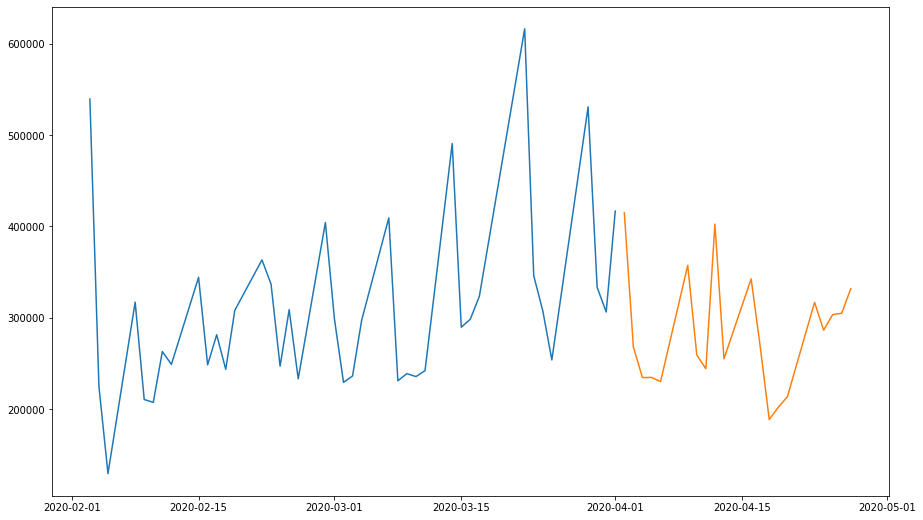

In [ ]:
plt.plot(train_set)
plt.plot(test_set)

In [ ]:
from statsmodels.tsa.ar_model import AR

ar_2 = AR(train_set).fit(2)

ar_2.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const                  312137.638100
L1.total_encomendas         0.088011
L2.total_encomendas        -0.106222
dtype: float64

In [ ]:
previsoes = ar_2.params[0] + test_set.shift(1) * ar_2.params[1] + test_set.shift(2) * ar_2.params[2]

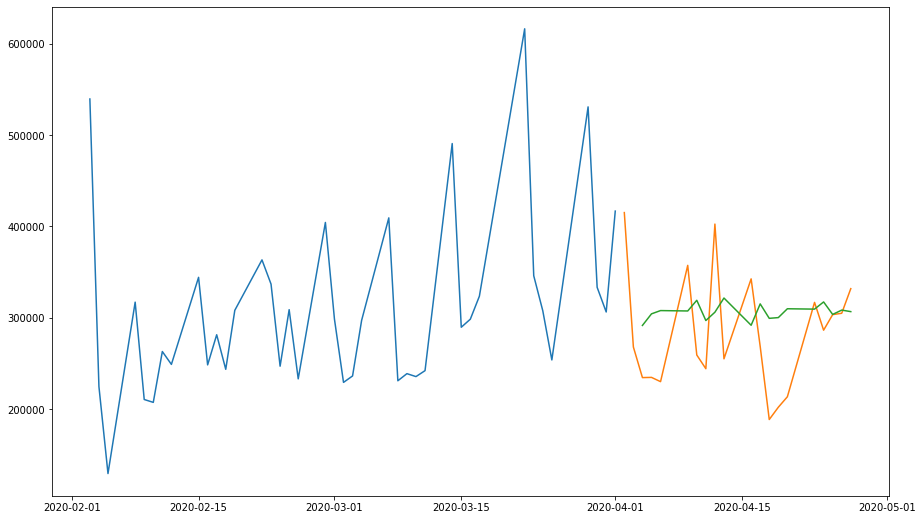

In [ ]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsoes)



---



---



In [ ]:
ar_5 = AR(train_set).fit(5)
ar_5.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const                  121770.197540
L1.total_encomendas         0.008632
L2.total_encomendas        -0.048075
L3.total_encomendas         0.018162
L4.total_encomendas         0.518361
L5.total_encomendas         0.153645
dtype: float64

In [ ]:
previsoes2 = ar_5.params[0]
for i, param in enumerate(ar_5.params[1:]):
    previsoes2 += test_set.shift(i + 1) * param
previsoes2

Date
2020-04-02              NaN
2020-04-03              NaN
2020-04-04              NaN
2020-04-05              NaN
2020-04-06              NaN
2020-04-09    319443.930535
2020-04-10    280792.378651
2020-04-11    268706.703026
2020-04-12    273226.557010
2020-04-13    338819.723561
2020-04-16    298347.120713
2020-04-17    286211.457374
2020-04-18    358472.020803
2020-04-19    310777.894424
2020-04-20    336108.544997
2020-04-23    309218.537165
2020-04-24    256948.539073
2020-04-25    246585.703898
2020-04-26    258089.358307
2020-04-27    312062.933854
Name: total_encomendas, dtype: float64

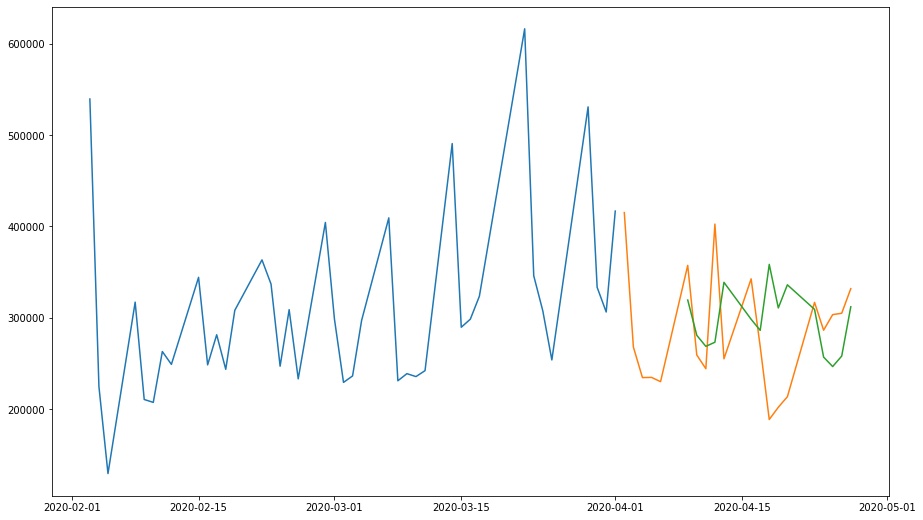

In [ ]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsoes2)



---

Modelo ARMA

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
arma_2_2 = ARMA(df.total_encomendas, order=(2, 2)).fit()
(arma_2_2.resid ** 2).mean()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


7462277918.812207

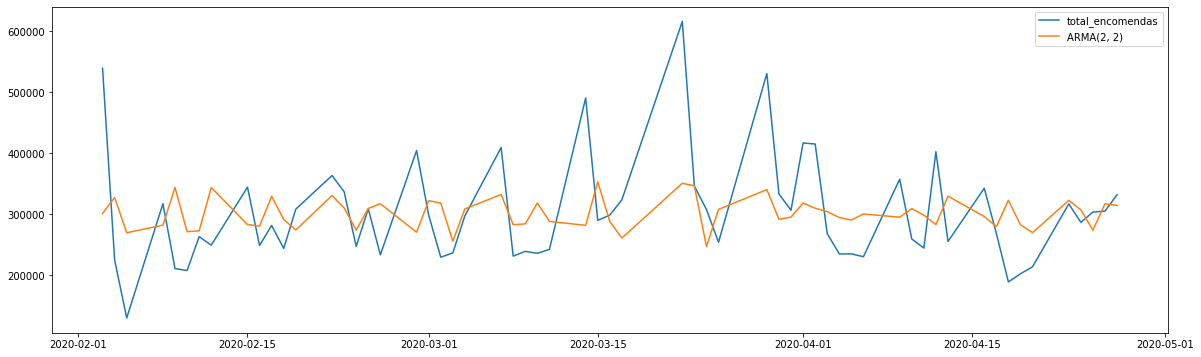

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df.total_encomendas)
plt.plot(arma_2_2.predict())
plt.legend(['total_encomendas', 'ARMA(2, 2)'])



---

Modelo ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(df.total_encomendas, order=(5,1,2)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


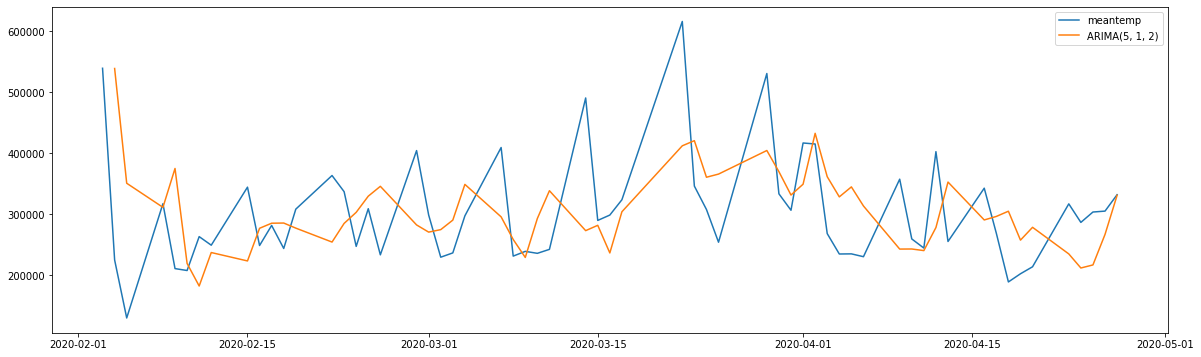

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df.total_encomendas)
plt.plot(arima.predict(typ='levels'))
plt.legend(['meantemp', 'ARIMA(5, 1, 2)'])

O Modelo Integrado Auto-regressivo de Média Móveis (ARIMA) acima parece ser o que apresenta um melhor resultado.




---



---



---

# Predição dos Demais Casos (tipos de encomendas)



---



---



---

# Apresentação dos Resultados

## OBS.: Não tive tempo hábil para a conclusão do projeto, se me derem mais um ou dois dias posso terminar o estudo.

## OBS2.: Os treinamentos apresentam resultados com baixa acurácia devido ao pouco número de linhas para que se tenha uma boa previsão. Mais variáveis além dos número totais de encomendas também podem auxiliar num melhor modelo para o problema.